## Московский Авиационный Институт

# Лабораторная работа по предмету Численные методы №2
### "Методы решения нелинейных уравнений и систем нелинейных уравнений"
**Преподаватель**: Филиппов Глеб Сергеевич \
**Судент**: Титеев Рамиль \
**Группа**: М8О-305Б-21\
Вариант 26


Импортируем библиотеки, для дальнейшей работы с ними

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

plt.style.use('seaborn-v0_8-pastel')

## Задание 2.1

Реализовать методы простой итерации и Ньютона решения нелинейных уравнений в виде программ, задавая в качестве входных данных точность вычислений. С использованием разработанного программного обеспечения найти положительный корень нелинейного уравнения (начальное приближение определить графически). Проанализировать зависимость погрешности вычислений от количества итераций.

Задано уравнение:
$$lg(x+1) - x + 0.5 = 0$$

1. Реализуем метод простых итераций:

In [2]:
def simple_iteration(f: Callable[[float], float], 
                     phi: Callable[[float], float],
                     x0:float, 
                     eps=1e-8, 
                     max_iter=1000
)-> tuple[float, list[float]]:
    """
    Метод простых итераций

    Args:
        f (Callable[[float], float]): Заданная функция
        phi (Callable[[float], float]): Исходная функция в нормальном виде
        x0 (float): начальное значение точки
        eps (_type_, optional): Точность вычислений. Defaults to 1e-8.
        max_iter (int, optional): Максимальное число итераций. Defaults to 1000.

    Returns:
        tuple[float, list[float]]: Найденное значение и массив погрешностей
    """

    x = x0
    resids = []
    for iter in range(max_iter):
        x_new = phi(x)
        resids.append(abs(x - x_new))
        if abs(x_new - x) < eps:
            return x, resids
        x = x_new

    return x, resids

2. Реализуем метод Ньютона

In [3]:
def newton_method(f: Callable[[float], float], 
                  df: Callable[[float], float], 
                  x0: float, 
                  eps=1e-8, 
                  max_iter=100
)-> tuple[float, list[float]]:
    """
    Метод Ньютона

    Args:
        f (Callable[[float], float]): Исходная функция
        df (Callable[[float], float]): Производная функции
        x0 (float): Начальное значение
        eps (float, optional): Точность вычислений. Defaults to 1e-8.
        max_iter (int, optional): Максимальное число итераций. Defaults to 100.

    Returns:
        tuple[float, list[float]]: Найденное значение и массив погрешностей
    """

    x = x0
    resids = []
    for i in range(max_iter):
        if df(x) == 0:
            print("Производная равна нулю. Метод не может быть применен.")
            return None, i
        x_new = x - f(x) / df(x)
        resids.append(abs(x - x_new))
        if abs(x_new - x) < eps:
            return x, resids
        x = x_new
    
    return x, resids

3. Напишем функцию, заданную вариантом, а также её производную

In [4]:
def f(x):
    return np.log10(x+1) - x + 0.5

def phi(x):
    return np.log10(x+1) + 0.5


def df(x):
    eps = 1e-10
    return (f(x+eps)-f(x))/eps

4. Сделаем расчеты для варианта

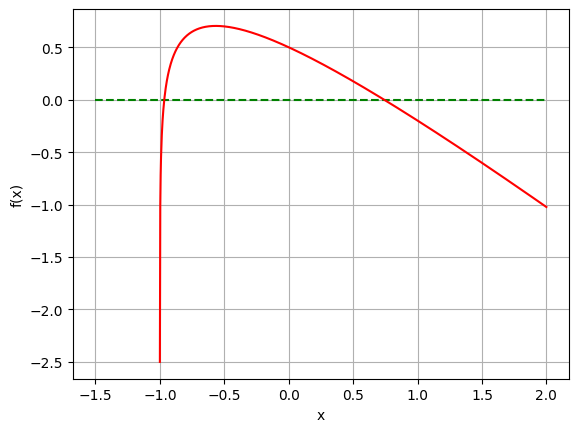

In [5]:
plt.grid(True)
plt.xlabel("x")
plt.ylabel("f(x)")
x = np.linspace(-1+1e-4, 2, 1000)
plt.hlines(0, -1.5, 2, linestyles='--', colors='g')
plt.plot(x, f(x), c='r')
plt.show()

In [6]:
x0 = 0.5  # начальное приближение
epsilon = 1e-6  # точность
max_iter = 1000  # максимальное количество итераций

In [7]:
root_simple, res_simple = simple_iteration(f, phi, x0)
print("Простой метод итерации: корень =", root_simple)

root_newton, res_newton = newton_method(f, df, x0)
print("Метод Ньютона: корень =", root_newton)

Простой метод итерации: корень = 0.7407318803014871
Метод Ньютона: корень = 0.7407318841640669


5. Проведем анализ зависимости погрешности вычеслений от кол-ва итераций

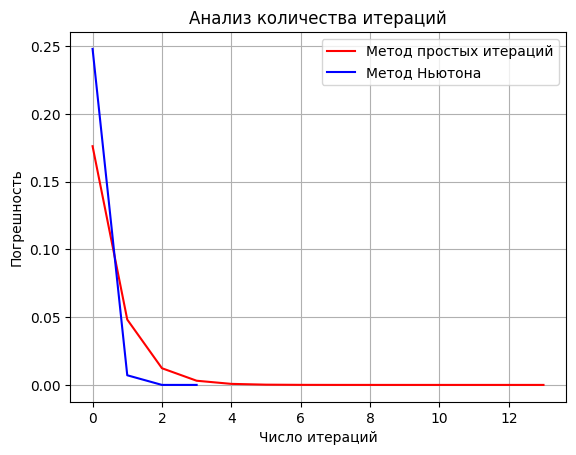

In [8]:
plt.plot(np.arange(len(res_simple)), res_simple, label='Метод простых итераций', c='r')
plt.plot(np.arange(len(res_newton)), res_newton, label='Метод Ньютона', c='b')
plt.grid(True)
plt.title('Анализ количества итераций')
plt.ylabel('Погрешность')
plt.xlabel('Число итераций')
plt.legend()

### Вывод 2.1
Были реализованы метод простых итераций и метод Ньютона. Также был проведен анализ зависимости погрешности вычеслений от кол-ва итераций. Из графика можно сделать вывод, что Метод Ньютона обладает лучшей сходимостью.

## Задание 2.2

Реализовать методы простой итерации и Ньютона решения систем нелинейных уравнений в виде программного кода, задавая в качестве входных данных точность вычислений. С использованием разработанного программного обеспечения решить систему нелинейных уравнений (при наличии нескольких решений найти то из них, в котором значения неизвестных являются положительными); начальное приближение определить графически. Проанализировать зависимость погрешности вычислений от количества итераций.

Задана система:

$$\begin{cases}
2x_1^2 - x_2 + x_2^2 - 2 &= 0,\\
x_1 - \sqrt{x_2 + 2} +1 &= 0,
\end{cases}$$

1. Реализуем Метод Простых Итераций

In [9]:
def simple_iteration_system(F: Callable[[float,float], list[float]],
                            Phi: Callable[[float,float], list[float]],
                            x0: float,
                            tol=1e-15,
                            max_iter=1000
)-> tuple[list[float], list[float]]:
    """
    Метод простых итераций для системы

    Args:
        F (Callable[[float,float], list[float]]): Исходная система
        Phi (Callable[[float,float], list[float]]): Исходная система в нормальном виде
        x0 (float): Начальное приближение
        tol (float, optional): Точность вычисления. Defaults to 1e-6.
        max_iter (int, optional): Максимальное число итераций. Defaults to 1000.

    Returns:
        tuple[list[float], list[float]]: Найденые корни и массив погрешностей
    """
    
    x = x0.copy()
    resids = []
    for i in range(max_iter):
        x_new = Phi(x)
        resids.append(np.linalg.norm(x_new - x))
        if np.linalg.norm(x_new - x) < tol:
            return x_new, resids
        x = x_new
    return x, resids

2. Реализуем Метод Ньютона

In [10]:
def newton_method_system(F: Callable[[float,float], list[float]],
                         J: Callable[[float,float], list[float]],
                         x0: float,
                         tol=1e-10,
                         max_iter=1000
)-> tuple[list[float], list[float]]:
    """
    Метод Ньютона для системы

    Args:
        F (Callable[[float,float], list[float]]): Исходная система
        J (Callable[[float,float], list[float]]): Матрица Якоби для системы
        x0 (float): Начальное приближение
        tol (float, optional): Точность вычисления. Defaults to 1e-10.
        max_iter (int, optional): Максимальное число итераций. Defaults to 1000.

    Returns:
        tuple[list[float], list[float]]: Найденые корни и массив погрешностей
    """

    x = x0.copy()
    resids = []
    for i in range(max_iter):
        J_x = J(x)
        if np.linalg.det(J_x) == 0:
            print("Матрица Якоби вырождена. Метод не может быть применен.")
            return None, i
        F_x = F(x)
        delta_x = np.dot(np.linalg.inv(J_x), F_x)
        x_new = x - delta_x
        resids.append(np.linalg.norm(x_new - x))
        if np.linalg.norm(x_new - x) < tol:
            return x_new, resids
        x = x_new
    return x, resids

3. Напишем систему, заданную вариантом, а также её матрицу Якоби

In [11]:
def F(x):
    return np.array([
            2*(x[0]**2) - x[1] + x[1]**2 - 2,
            x[0] - np.sqrt(x[1]+2) + 1
    ])

def Phi(x):
    return np.array([
                np.sqrt((2 - x[1]**2 + x[1])/2),
                (1 + x[0])**2 - 2
            ])

def J(x):
    return np.array([
        [4*x[0], 2*x[1]-1],
        [1, -1/(2*np.sqrt(x[1]+2))]   
    ])


4. Сделаем расчеты для варианта

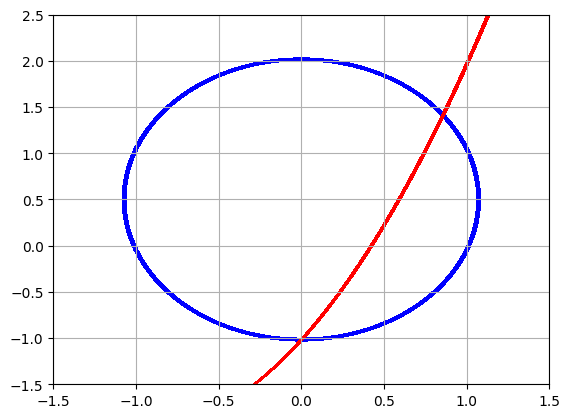

In [12]:
x, y = np.linspace(-1.5,1.5,100), np.linspace(-1.5,2.5,100)
X, Y = np.meshgrid(x, y)
func = F([X,Y])
plt.contourf(X, Y, func[0], levels=[0,0.1], colors="b")
plt.contourf(X, Y, func[1], levels=[0,0.02], colors="r")
plt.grid(True)
plt.show()

In [15]:
x_0 = np.array([0, 0])
# Метод простой итерации
roots, res_simple = simple_iteration_system(F, Phi, x_0)
print(f"Метод простой итерации: Корни = {roots}")


x_0 = np.array([1, 1.5]) 
# Метод Ньютона
roots, res_newton = newton_method_system(F, J, x_0)
print(f"Метод Ньютона: Корни = {roots}")

Метод простой итерации: Корни = [ 0. -1.]
Метод Ньютона: Корни = [0.84546609 1.40574509]


5. Проведем анализ зависимости погрешности вычеслений от кол-ва итераций

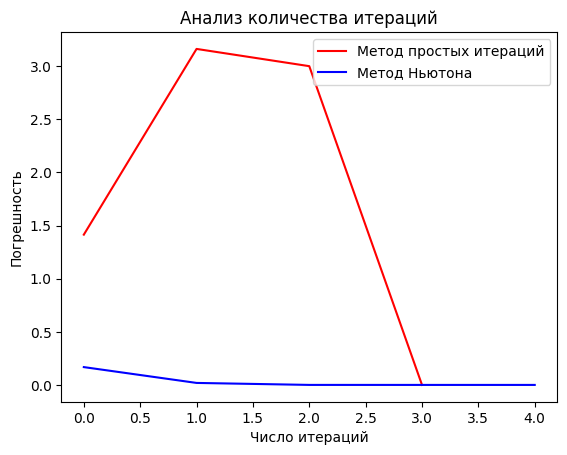

In [16]:
plt.plot(np.arange(len(res_simple)), res_simple, label='Метод простых итераций', c='r')
plt.plot(np.arange(len(res_newton)), res_newton, label='Метод Ньютона', c='b')

plt.title('Анализ количества итераций')
plt.ylabel('Погрешность')
plt.xlabel('Число итераций')
plt.legend()

### Вывод 2.2
Были реализованы метод простых итераций и метод Ньютона для решения системы не линейных уравнений. Также был проведен анализ зависимости погрешности вычеслений от кол-ва итераций. 